EDA Refresh

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('merged-df.csv')

df.head(10)

,transaction_id,date,user_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_card_brand,card_card_type,card_has_chip,card_cvv,card_expires,card_num_cards_issued,card_credit_limit,card_acct_open_date,card_year_pin_last_changed,card_card_on_dark_web
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523,...,Mastercard,Debit (Prepaid),YES,306,2022-07-01,2,55.0,2008-05-01,2008,No
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722,...,Mastercard,Credit,YES,438,2024-12-01,1,9100.0,2005-09-01,2015,No
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084,...,Mastercard,Debit,YES,256,2020-05-01,1,14802.0,2006-01-01,2008,No
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307,...,Mastercard,Debit,NO,54,2024-10-01,2,37634.0,2004-05-01,2006,No
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776,...,Visa,Debit,YES,120,2020-01-01,1,19113.0,2009-07-01,2014,No
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464,...,Mastercard,Debit (Prepaid),YES,198,2014-03-01,1,89.0,2008-01-01,2015,No
6,7475334,2010-01-01 00:09:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523,...,Mastercard,Debit (Prepaid),YES,306,2022-07-01,2,55.0,2008-05-01,2008,No
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online Transaction,39021,ONLINE,Unknown,Unknown,...,Mastercard,Debit (Prepaid),YES,513,2021-05-01,1,46.0,2007-03-01,2012,No
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,Unknown,Unknown,...,Visa,Debit,YES,833,2020-06-01,1,23401.0,2008-10-01,2011,No
9,7475337,2010-01-01 00:21:00,351,1112,10.74,Swipe Transaction,3864,Flushing,NY,11355,...,Mastercard,Debit (Prepaid),YES,893,2023-11-01,2,54.0,2007-02-01,2010,No


In [2]:
# Only select columns that are not very meaningful for analysis

df = df.drop(columns=['user_address','card_has_chip','card_cvv','card_year_pin_last_changed','card_card_on_dark_web'],axis=1)

df.columns

Index(['transaction_id', 'date', 'user_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'description', 'category', 'user_current_age', 'user_retirement_age',
       'user_birth_year', 'user_birth_month', 'user_gender', 'user_latitude',
       'user_longitude', 'user_per_capita_income', 'user_yearly_income',
       'user_total_debt', 'user_credit_score', 'user_num_credit_cards',
       'card_card_brand', 'card_card_type', 'card_expires',
       'card_num_cards_issued', 'card_credit_limit', 'card_acct_open_date'],
      dtype='object')

In [4]:
# EDA for user level
df_user = df[['user_id','user_gender','user_current_age','user_birth_year', 'user_yearly_income', 'user_per_capita_income',
               'user_credit_score', 'user_total_debt','user_retirement_age', 'user_birth_month',
               'card_num_cards_issued','user_latitude','user_longitude']]

df_user.describe(include='all')


df_user = (
    df_user.groupby('user_id')
    .agg({
        'user_gender': 'first',
        'user_current_age': 'first',
        'user_birth_year': 'first',
        'user_yearly_income': 'first',
        'user_per_capita_income': 'first',
        'user_credit_score': 'first',
        'user_total_debt': 'first',
        'user_retirement_age': 'first',
        'user_birth_month': 'first',
        'card_num_cards_issued': 'first',
        'user_latitude': 'first',
        'user_longitude': 'first'
    })
    .reset_index()
)

In [12]:
# Feature engineering
# year to retirement
df_user['year_to_retirement'] = np.where(
    df_user['user_current_age'] >= df_user['user_retirement_age'],
    0,df_user['user_retirement_age'] - df_user['user_current_age'])

# total_dept to yearly income
df_user['debt_to_yearly_income_ratio'] = (df_user['user_total_debt'] / 
                                          df_user['user_yearly_income']).replace([np.inf, -np.inf], 0)
# income per card
df_user['income_per_card'] = (df_user['user_yearly_income'] / 
                              df_user['card_num_cards_issued']).replace([np.inf, -np.inf], 0)
# multiple cards user
df_user['multi_card_user'] = (df_user['card_num_cards_issued'] > 1).astype(int)

In [13]:
# transaction data
txn_agg = (df.groupby('user_id').agg(
        total_txn_count=('transaction_id', 'count'),
        total_amount=('amount', 'sum'),
        avg_amount=('amount', 'mean'),
        std_amount=('amount', 'std'),
        median_amount=('amount', 'median'),
        first_txn=('date', 'min'),
        last_txn=('date', 'max')
    ).reset_index())

all_df = txn_agg.merge(df_user, on='user_id', how='inner')



In [14]:
all_df.columns

Index(['user_id', 'total_txn_count', 'total_amount', 'avg_amount',
       'std_amount', 'median_amount', 'first_txn', 'last_txn', 'user_gender',
       'user_current_age', 'user_birth_year', 'user_yearly_income',
       'user_per_capita_income', 'user_credit_score', 'user_total_debt',
       'user_retirement_age', 'user_birth_month', 'card_num_cards_issued',
       'user_latitude', 'user_longitude', 'year_to_retirement',
       'debt_to_yearly_income_ratio', 'income_per_card', 'multi_card_user'],
      dtype='object')

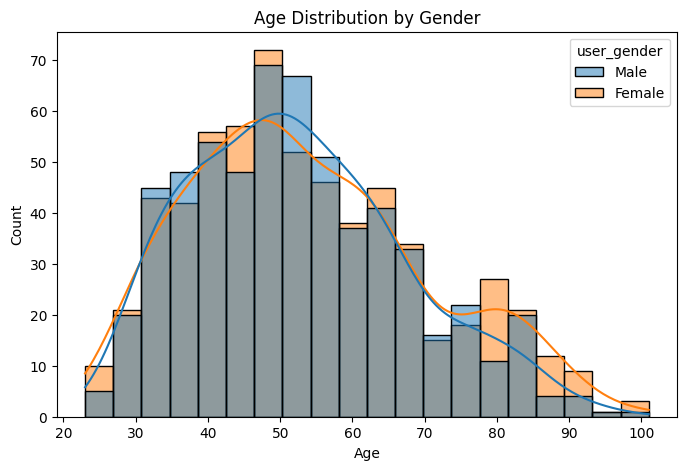

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
sns.histplot(all_df, x='user_current_age', hue='user_gender', kde=True, bins=20)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

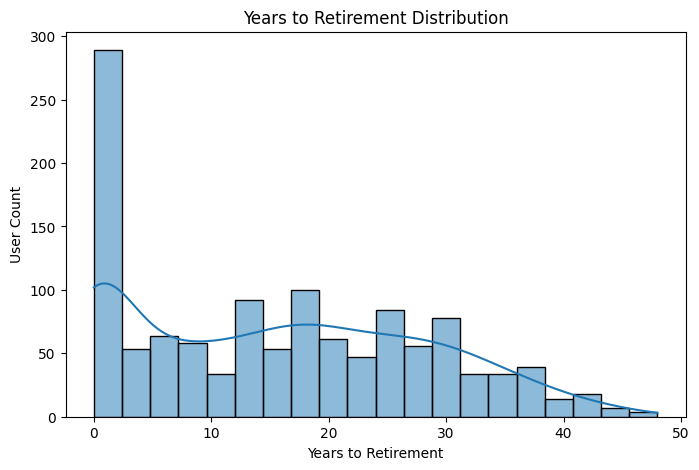

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(all_df['year_to_retirement'], bins=20, kde=True)
plt.title('Years to Retirement Distribution')
plt.xlabel('Years to Retirement')
plt.ylabel('User Count')
plt.show()


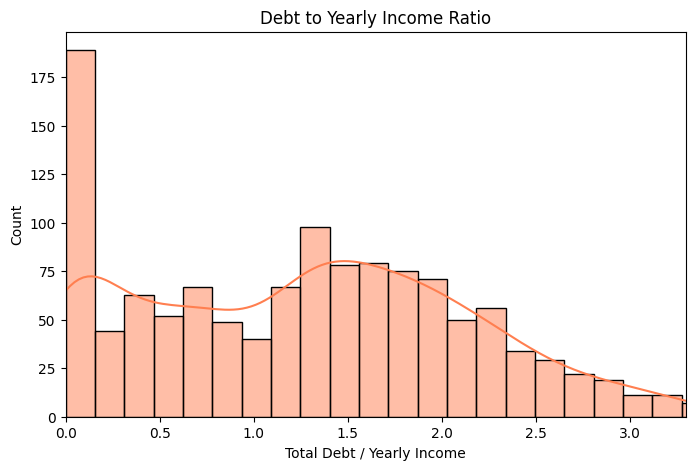

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(all_df['debt_to_yearly_income_ratio'], bins=30, kde=True, color='coral')
plt.title('Debt to Yearly Income Ratio')
plt.xlabel('Total Debt / Yearly Income')
plt.ylabel('Count')
plt.xlim(0, np.percentile(all_df['debt_to_yearly_income_ratio'].dropna(), 99))
plt.show()

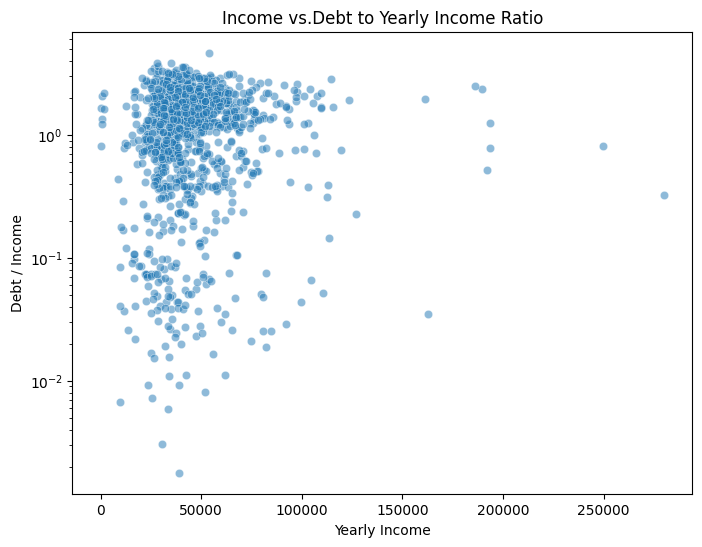

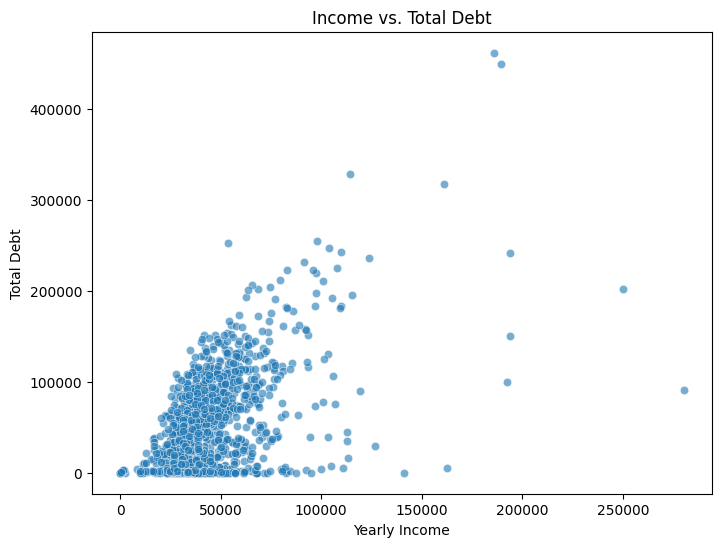

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=all_df, x='user_yearly_income', y='debt_to_yearly_income_ratio', alpha=0.6)
plt.title('Income vs.Debt to Yearly Income Ratio')
plt.xlabel('Yearly Income')
plt.ylabel('Debt / Income')
plt.yscale('log')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=all_df, x='user_yearly_income', y='user_total_debt', alpha=0.6)
plt.title('Income vs. Total Debt')
plt.xlabel('Yearly Income')
plt.ylabel('Total Debt')
plt.show()

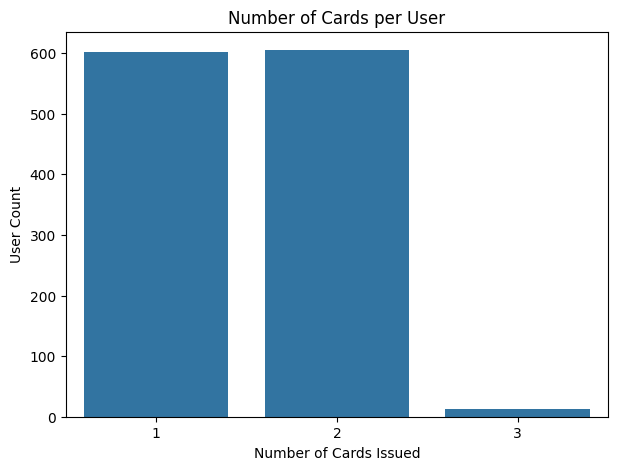

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x='card_num_cards_issued', data=all_df)
plt.title('Number of Cards per User')
plt.xlabel('Number of Cards Issued')
plt.ylabel('User Count')
plt.show()


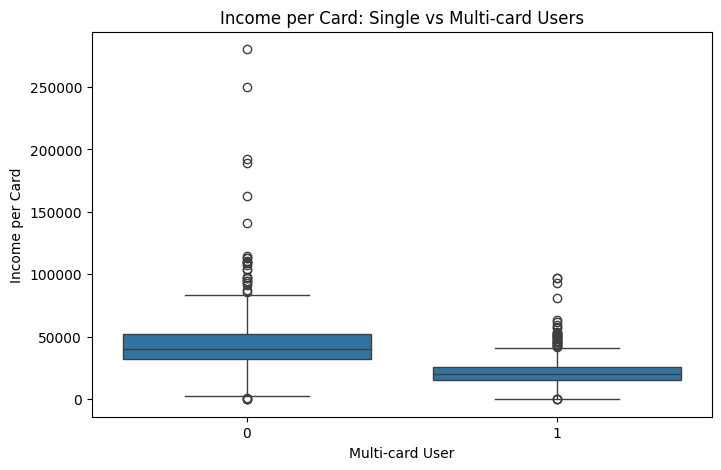

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='multi_card_user', y='income_per_card', data=df_user)
plt.title('Income per Card: Single vs Multi-card Users')
plt.xlabel('Multi-card User')
plt.ylabel('Income per Card')
plt.show()

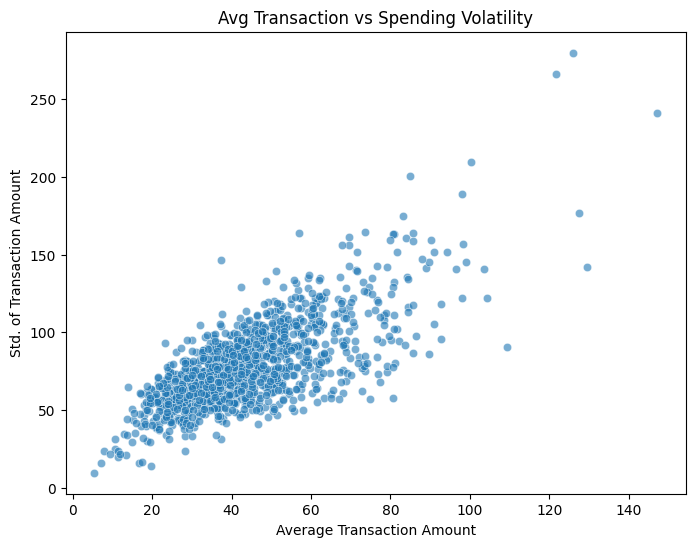

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=all_df, x='avg_amount', y='std_amount', alpha=0.6)
plt.title('Avg Transaction vs Spending Volatility')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Std. of Transaction Amount')
plt.show()
# central tendency vs variability

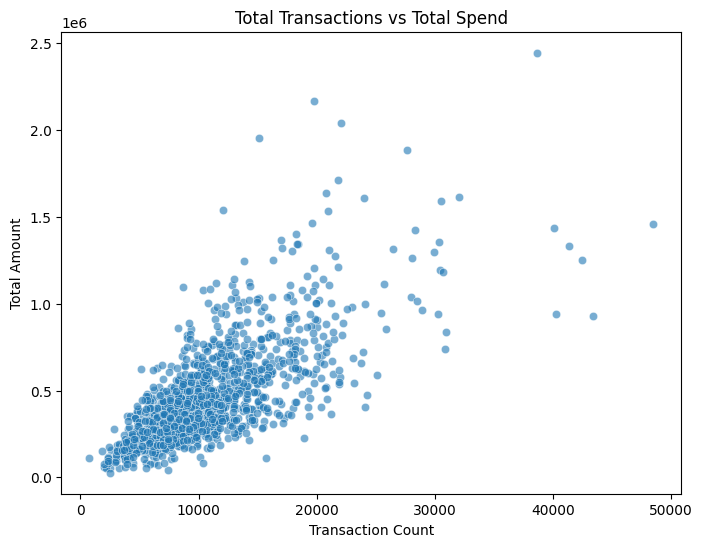

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=all_df, x='total_txn_count', y='total_amount', alpha=0.6)
plt.title('Total Transactions vs Total Spend')
plt.xlabel('Transaction Count')
plt.ylabel('Total Amount')
plt.show()

# transact more also spend more

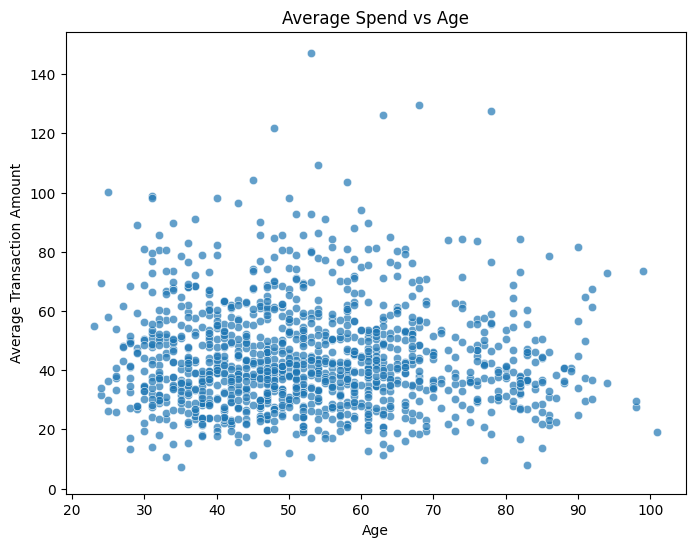

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=all_df, x='user_current_age', y='avg_amount', alpha=0.6)
plt.title('Average Spend vs Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.show()

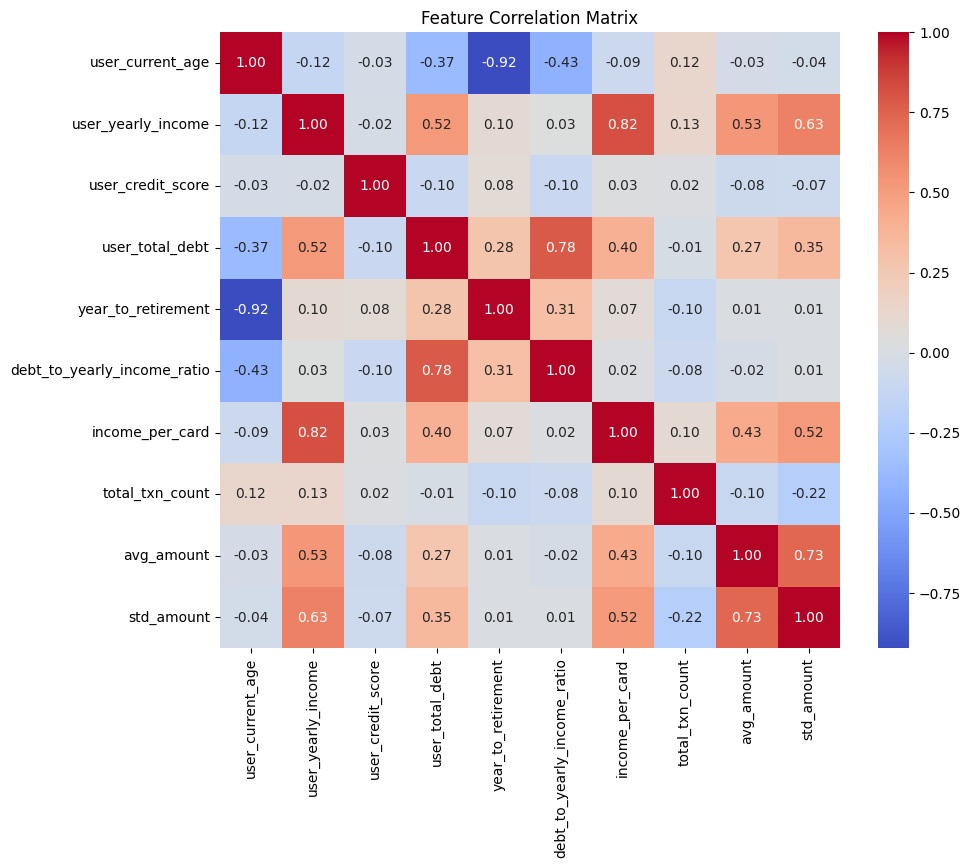

In [31]:
num_cols = ['user_current_age', 'user_yearly_income', 'user_credit_score',
             'user_total_debt', 'year_to_retirement', 'debt_to_yearly_income_ratio',
             'income_per_card', 'total_txn_count', 'avg_amount', 'std_amount']

plt.figure(figsize=(10,8))
sns.heatmap(all_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()